## /workspace/pcos_dataset 데이터셋 분포

In [ ]:
data_root_dir = "/workspace/pcos_dataset/Dataset"

from glob import glob 
import os
import pandas as pd 
data_files = glob(f"{data_root_dir}/*.png")

len(data_files)

In [ ]:
cls_dict = {
    "benign" : 0,
    "Bordlerine" : 0,
    "Malignant" : 0
}

pid_set = list()
pids, labels, filenames = list(), list(), list()
for data_file in data_files:
    filename = data_file.split("/")[-1].split('.')[0]
    label = data_file.split("/")[-1].split("_")[0]
    pid = data_file.split("/")[-1].split("_")[1]
    
    pids.append(pid)
    labels.append(label)
    filenames.append(filename)

    if label == str(0):
        cls_dict["benign"] += 1
    elif label == str(1):
        cls_dict["Bordlerine"] += 1
    elif label == str(2):
        cls_dict["Malignant"] += 1
    
    pid_set.append(pid)

# pid_set = list(set(pid_set))
# print(f"PID Length : {len(pid_set)}")
# df = pd.DataFrame(cls_dict, index=[0])
# df.to_csv("/workspace/pcos_dataset/Dataset_info.csv", index=False)

df = pd.DataFrame(
    {
        "pid" : pids,
        "filename" : filenames,
        "label" : labels
    }
)

df.to_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv", index=False)

## /workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv 데이터 분포

In [ ]:
import pandas as pd 

df = pd.read_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv")

def text_normalize(x):
    if isinstance(x, str):
        # x = x.replace(" ", "")
        x = x.lower()
        x= x.strip()
    return x
df['USG_Dignosis'] = df['USG_Dignosis'].apply(text_normalize)
df['Pathology_Dignosis'] = df['Pathology_Dignosis'].apply(text_normalize)

# df['USG_Dignosis'].value_counts().to_dict()

pathology_cls_dict = df['Pathology_Dignosis'].value_counts().to_dict()
usg_cls_dict = df['USG_Dignosis'].value_counts().to_dict()

pathology_df = pd.DataFrame(pathology_cls_dict, index=[0]).T
usg_df = pd.DataFrame(usg_cls_dict, index=[0]).T

display(pathology_df.head(3))
display(usg_df.head(3))
# pathology_df.to_csv("/workspace/pcos_dataset/pathology_cls.csv", index=True)
# usg_df.to_csv("/workspace/pcos_dataset/usg_cls.csv", index=True)

In [ ]:
# df['USG_Dignosis'].value_counts().to_dict()
# pd.DataFrame(df['label|0:양성, 1:중간형, 2:악성'].value_counts().to_dict(), index=[0]).T
print(f"pid length : {len(df)}")

## /workspace/pcos_dataset/labels/Ovariancyst_datamangerment.csv 데이터 분포

In [ ]:
import pandas as pd 
from IPython.display import display
df = pd.read_csv("/workspace/pcos_dataset/labels/Ovariancyst_datamangerment.csv")

def text_normalize(x):
    if isinstance(x, str):
        # x = x.replace(" ", "")
        x = x.lower()
        x= x.strip()
    return x
df['USG_Diagnosis'] = df['USG_Diagnosis'].apply(text_normalize)
df['Pathology_Diagnosis'] = df['Pathology_Diagnosis'].apply(text_normalize)

# df['USG_Diagnosis'].value_counts().to_dict()

pathology_cls_dict = df['Pathology_Diagnosis'].value_counts().to_dict()
usg_cls_dict = df['USG_Diagnosis'].value_counts().to_dict()

data_management_pathology_df = pd.DataFrame(pathology_cls_dict, index=[0]).T
data_management_usg_df = pd.DataFrame(usg_cls_dict, index=[0]).T

display(data_management_pathology_df.head(3))
display(data_management_usg_df.head(3))
print(f"pid length : {len(df)}")

## 기존 데이터 분포 <-> 라벨표기변경데이터시트 라벨차이

기존 라벨 pid 수 : 1171
변경 라벨 pid 수 : 1250
변경_df에서 기존에 없는 PIDs 개수: 79
# 기존 라벨과 변경 라벨의 라벨이 다른 경우 : 364개


,pid,filename,label,"label|0:양성, 1:중간형, 2:악성"
4,R1110,1_R1110_00004,1,2
5,R327,0_R327_00007,0,2
8,R980,1_R980_00005,1,2
12,R319,0_R319_00003,0,2
19,R1003,1_R1003_00001,1,2
...,...,...,...,...
1152,R527,0_R527_00001,0,1
1153,R682,1_R682_00001,1,0
1162,R329,0_R329_00001,0,2
1166,R531,0_R531_00001,0,1


기존 라벨과 변경 라벨간 이동행렬(Confusion Matrix, label 변화 count):


변경 라벨,0,1,2
기존 라벨,,,
0,798,23,53
1,63,6,120
2,19,86,3


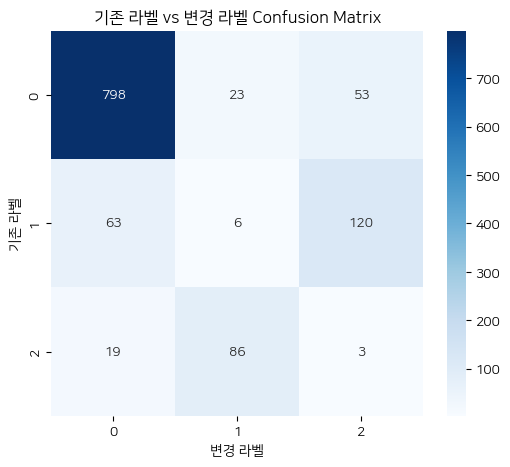

In [111]:
import pandas as pd 

기존_df = pd.read_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv")
변경_df = pd.read_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv")

""" 데이터 개수 차이가 79개 존재 / 기존_df : 1171개 / 변경_df : 1250개 """
# 기존 df에서 pid가 같으면 filename상관없이 (첫번째껄로)하고 나머지는 버린 다음 기존_pid_df로 만들어주라.
기존_pid_df = 기존_df.drop_duplicates(subset='pid', keep='first').reset_index(drop=True)
print(f"기존 라벨 pid 수 : {len(기존_pid_df)}")
print(f"변경 라벨 pid 수 : {len(변경_df)}")

""" 변경_df에서 PIDs가 기존_pid_df에 없는 경우 79개 존재"""
# 변경_df에서 PIDs가 기존_pid_df에 없는 경우 print
diff_pids = 변경_df[~변경_df['pid'].isin(기존_pid_df['pid'])]
print(f"변경_df에서 기존에 없는 PIDs 개수: {len(diff_pids)}")

### 기존_pid_df에서 label이 변경_df와 다른 경우 해당하는 filename 출력
기존_pid_df['label'] = 기존_pid_df['label'].astype(str)
변경_df['label|0:양성, 1:중간형, 2:악성'] = 변경_df['label|0:양성, 1:중간형, 2:악성'].astype(str)


# pid 기준으로 두 DataFrame을 merge한 뒤, label이 다른 경우를 찾음
merged = pd.merge(
    기존_pid_df[['pid', 'filename', 'label']],
    변경_df[['pid', 'label|0:양성, 1:중간형, 2:악성']],
    on='pid',
    how='inner'
)

diff_df = merged[merged['label'] != merged['label|0:양성, 1:중간형, 2:악성']]
print(f"# 기존 라벨과 변경 라벨의 라벨이 다른 경우 : {len(diff_df)}개")
display(diff_df)


# 기존 df와 변경 df간의 라벨 이동 차이 이동행렬 제대로 구하기

# '기존_pid_df'와 '변경_df'는 각각 pid별로 존재하는 라벨임 (서로 컬럼명 다름에 주의)
# '기존라벨' 과 '변경라벨'이라는 새 컬럼 만들어서 pid별로 merge
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='NanumSquare')
import seaborn as sns

label_compare_df = pd.merge(
    기존_pid_df[['pid', 'label']],
    변경_df[['pid', 'label|0:양성, 1:중간형, 2:악성']],
    on='pid',
    how='inner'
).rename(columns={
    'label': '기존라벨',
    'label|0:양성, 1:중간형, 2:악성': '변경라벨'
})

# 이동행렬 구하기
movement_table = pd.crosstab(label_compare_df['기존라벨'], label_compare_df['변경라벨'])
movement_table.index.name = "기존 라벨"
movement_table.columns.name = "변경 라벨"

print("기존 라벨과 변경 라벨간 이동행렬(Confusion Matrix, label 변화 count):")
display(movement_table)

# Confusion matrix 시각화
plt.figure(figsize=(6,5))
sns.heatmap(movement_table, annot=True, fmt='d', cmap='Blues')
plt.title('기존 라벨 vs 변경 라벨 Confusion Matrix')
plt.ylabel('기존 라벨')
plt.xlabel('변경 라벨')
plt.show()



## /workspace/pcos_dataset/labels/기존_Dataset_info.csv 에서 데이터 분포확인

In [ ]:
import pandas as pd 

df = pd.read_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv")

label_dist_df = pd.DataFrame(df['label'].value_counts()).reset_index()

label_dist_df

,label,count
0,0,2059
1,1,542
2,2,367




label|0:양성, 1:중간형, 2:악성	count
0	933
2	192
1	125


In [ ]:
import pandas as pd 

df = pd.read_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv")

label_dist_df = pd.DataFrame(df["label|0:양성, 1:중간형, 2:악성"].value_counts()).reset_index()

label_dist_df

,"label|0:양성, 1:중간형, 2:악성",count
0,0,933
1,2,192
2,1,125


### 변경_Dataset_info.csv 제작

In [ ]:
import pandas as pd 

# 기존 데이터
기존_df = pd.read_csv("/workspace/pcos_dataset/labels/기존_Dataset_info.csv")
# 변경 라벨 시트 (pid, ~, ~, 'label|0:양성, 1:중간형, 2:악성')
변경_df = pd.read_csv("/workspace/pcos_dataset/labels/라벨표기변경데이터시트.csv")
save_path = "/workspace/pcos_dataset/labels/변경_Dataset_info.csv"

# pid 기준으로 merge하여 label 업데이트
# 변경_df에서 필요한 컬럼만 (pid, label)
label_map = 변경_df.set_index('pid')["label|0:양성, 1:중간형, 2:악성"]

# 기존_df의 pid가 변경_df에 존재할 때만 label을 덮어씌운다
변경후_df = 기존_df.copy()
변경후_df['label'] = 변경후_df['pid'].map(label_map).fillna(변경후_df['label'])

# 저장
변경후_df.to_csv(save_path, index=False)

## Bianry 제작

In [6]:
import pandas as pd 

multi_label_path = "/workspace/pcos_dataset/labels/기존_Dataset_info.csv"
df = pd.read_csv(multi_label_path)

binary_df = df[df['label'] != 1]
binary_df.to_csv(multi_label_path.replace(".csv", "_binary.csv"), index=False)